# *Build a model to predict movies on NETFLIX*

**Problem Statement** : More than 80 per cent of the TV shows people watch on Netflix are discovered through the platform’s recommendation system. Netflix uses machine learning and algorithms to help break viewers’ preconceived notions and find shows that they might not have initially chosen. 

The goal of this project is to analyse the data and various factors affecting the trend of Movies and Shows available on Netflix.  

Build a model to predict movies and TV-Shows on Netflix..

**About the Dataset**- 

*   This dataset consists of tv shows and movies available on Netflix.
*    The dataset is collected from Flixable which is a third-party Netflix search engine.





## Step 1: Import all the required libraries

*Pandas* : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series.

*Sklearn* : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.

*Pickle* : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

*Seaborn* : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

*Numpy* : NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

*Matplotlib* : Matplotlib is a low level graph plotting library in python that serves as a visualization utility.    

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import matplotlib.pyplot as plt  
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

## Step 2: Read dataset and basic details of dataset

*Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.*

    
In this stage we are going to read our problem dataset and have a look on it.

In [93]:
#we can upload the dataset from system :
df = pd.read_csv('C:/Users/Shubham/Desktop/NETFLIX MOVIE PREDICTION SYSTEM/DATA - netflix_titles.csv/netflix_titles.csv')


Display the Dataset

In [94]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [95]:
df.shape

(7787, 12)

    So, the dataset have 7787 rows and 12 columns

In [96]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [97]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [99]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [100]:
print("total number of cateogrical columns are ", len(objects_lst))
print("there names are as follows: ", objects_lst)

total number of cateogrical columns are  11
there names are as follows:  ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


In [101]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [102]:
print("total number of numerical columns are ", len(int64_lst))
print("there names are as follows: ", int64_lst)

total number of numerical columns are  1
there names are as follows:  ['release_year']


In [103]:
datetime_cols = ['datetime64']
datetime_lst = list(df.select_dtypes(include=datetime_cols).columns)

In [104]:
print("total number of datetime columns are ", len(datetime_cols))
print("there names are as follows: ", datetime_lst)

total number of datetime columns are  1
there names are as follows:  []


In [105]:
df.director.unique()

array([nan, 'Jorge Michel Grau', 'Gilbert Chan', ..., 'Josef Fares',
       'Mozez Singh', 'Sam Dunn'], dtype=object)

In [106]:
df.cast.unique()

array(['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi',
       'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato',
       'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim',
       ...,
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy',
       'Nasty C', 'Adriano Zumbo, Rachel Khoo'], dtype=object)

In [107]:
df["rating"].unique() #list of unique rating

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

Replacing ratings ages with some category (older kids , adults , teens , kids)

##We will find out percentage of missing values.

In [108]:
print("Percentage Of Missing Values")
Perc_Of_Missing_Values=df.isna().sum()/len(df)*100
Perc_Of_Missing_Values[Perc_Of_Missing_Values!=0]

Percentage Of Missing Values


director      30.679337
cast           9.220496
country        6.510851
date_added     0.128419
rating         0.089893
dtype: float64

The missing values and not required column :

    "show_id": Not that important. so i will be dropping this.
    "director": Very less information-not needed for the analysis so I will be dropping this.
    "cast": there are too many diferent values so I will be dropping this.
    "country":Important variable hence we need to fix this.
    "date_added": there are just a few cases, so lets scrap them.
    "rating": there are just a few cases, so lets fix them.
    "Description": Not that Important.So i will be dropping this.

 Drop (cast,director,show id,description) columns:

In [109]:
df.drop("cast",axis=1,inplace=True)
df.drop("director",axis=1,inplace=True)
df.drop("show_id",axis=1,inplace=True)
df.drop("description",axis=1,inplace=True)

Fill the missing values:

In [110]:
df["country"]=df["country"].fillna(df["country"].mode()[0])
df["rating"]=df["rating"].fillna(df["rating"].mode()[0])

In [111]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}  


In [112]:
df['target_ages'] = df['rating'].replace(ratings_ages)  #replace the ratings with above category
df['target_ages'].unique() 

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

Fix the Date_added Column:

In [113]:
df[df.date_added.isna()]

,type,title,country,date_added,release_year,rating,duration,listed_in,target_ages
258,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas",Adults
549,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,Older Kids
2263,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Older Kids
2288,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",Teens
2555,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows",Teens
3374,TV Show,Kikoriki,United States,NaN,2010,TV-Y,2 Seasons,Kids' TV,Kids
3492,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...",Teens
3946,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,Adults
5137,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",Adults
6065,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies",Older Kids


We will drop those Rows.They are only 10 Rows .Becoz it is difficult to add date of those Rows

In [114]:
df=df[df["date_added"].notna()]

Check the Cleaned dataset

In [115]:
df.isna().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
target_ages     0
dtype: int64

Let's make New Columns:

In [116]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_added'].head()

0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: object

In [117]:
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_added'].head()

0      August
1    December
2    December
3    November
4     January
Name: month_added, dtype: object

In [118]:
df.replace({'TV Show': 0, 'Movie': 1}, df["type"]) #replace tv show with 0 and movie with 1

,type,title,country,date_added,release_year,rating,duration,listed_in,target_ages,year_added,month_added
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Adults,2020,August
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",Adults,2016,December
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",Adults,2018,December
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",Teens,2017,November
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,Teens,2020,January
...,...,...,...,...,...,...,...,...,...,...,...
7782,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",Adults,2020,October
7783,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",Teens,2019,March
7784,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...",Adults,2020,September
7785,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Older Kids,2020,October


In [119]:
df

,type,title,country,date_added,release_year,rating,duration,listed_in,target_ages,year_added,month_added
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Adults,2020,August
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",Adults,2016,December
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",Adults,2018,December
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",Teens,2017,November
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,Teens,2020,January
...,...,...,...,...,...,...,...,...,...,...,...
7782,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",Adults,2020,October
7783,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",Teens,2019,March
7784,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...",Adults,2020,September
7785,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Older Kids,2020,October


## Step 2 Insights:-
1. We have total 42 features where 32 of them are integer type while others are object type.
2. Replacing ratings ages with some category (older kids , adults , teens , kids)
3. Drop cast,director,show id,description columns. 
4. Create a new year_added and month_added  column with the help of date_added column.

# Step 3: Descriptive Analysis

Goal/Purpose:-
Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness


In [120]:
df.describe(include='all')

,type,title,country,date_added,release_year,rating,duration,listed_in,target_ages,year_added,month_added
count,7777,7777,7777,7777,7777.000000,7777,7777,7777,7777,7777,7777
unique,2,7777,681,1565,NaN,14,216,491,4,14,13
top,Movie,3%,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Adults,2019,December
freq,5377,1,3055,118,NaN,2868,1608,334,3624,2153,817
mean,NaN,NaN,NaN,NaN,2013.935965,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,8.760694,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Measure the variability of data of the dataset
Variability describes how far apart data points lie from each other and from the center of a distribution.

## 1. Standard Deviation
The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.

In [121]:
df.std()

release_year    8.760694
dtype: float64

In [122]:
def std_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df
std_cal(df, int64_lst)

,normal_value,zero_value
0,1,0


## 2. Variance
The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

In [123]:
df.var()

release_year    76.749757
dtype: float64

In [124]:
zero_cols = []

def var_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df
var_cal(df, int64_lst)

,normal_value,zero_value
0,1,0


## Measure central tendency
A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.

## 1. Mean
The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

In [125]:
df.mean()

release_year    2013.935965
year_added              inf
dtype: float64

In [126]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df
mean_cal(df, int64_lst)

,normal_value,zero_value
0,1,0


## 2. Median
The median is the middle value. It is the value that splits the dataset in half.

In [127]:
df.median()

release_year    2017.0
year_added      2019.0
dtype: float64

In [128]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df
median_cal(df, int64_lst)

,normal_value,zero_value
0,1,0


A variable that is always zero will necessarily have mean and median zero.

A variable that can in principle be only zero or positive can only have mean zero if all values in practice are zero. On the other hand, such a variable can and will have median zero if more than half of the values are zero. Such variables are very common and include counts and indicators (commonly, variables that are 1 or 0).

## 3. Mode
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

In [129]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in int64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df
mode_cal(df, list(df.columns))

,normal_value,zero_value,string_value
0,1,0,10


In [130]:
df.duplicated().sum() #check for duplicate value

0

# Null and Nan values
## 1. Null Values

In [131]:
df.isnull().sum() #null value

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
target_ages     0
year_added      0
month_added     0
dtype: int64

In [132]:
df.isna().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
target_ages     0
year_added      0
month_added     0
dtype: int64

## Count of unique occurences of every value in all categorical value

In [133]:
for value in objects_lst:
    
    print(value,df[value].value_counts())

KeyError: 'show_id'

## Skewness of the columns

In [134]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [135]:
int64_cols = ['int64']
int64_lst_col = list(df.select_dtypes(include=int64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, int64_lst_col)

In [136]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,release_year,-3.6204,negative (-ve) skewed


In [137]:
skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,0,0,1


we notice with the above results that we have following details:

1 is negative skewed


## Step 3 Insights:-
With the statistical analysis we have found that the data have a lot of skewness in them mostly are +vely skewed while most of the columns have zero varience

# Step 4: Data Exploration
## Goal/Purpose:-
Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns

## 1. Histogram

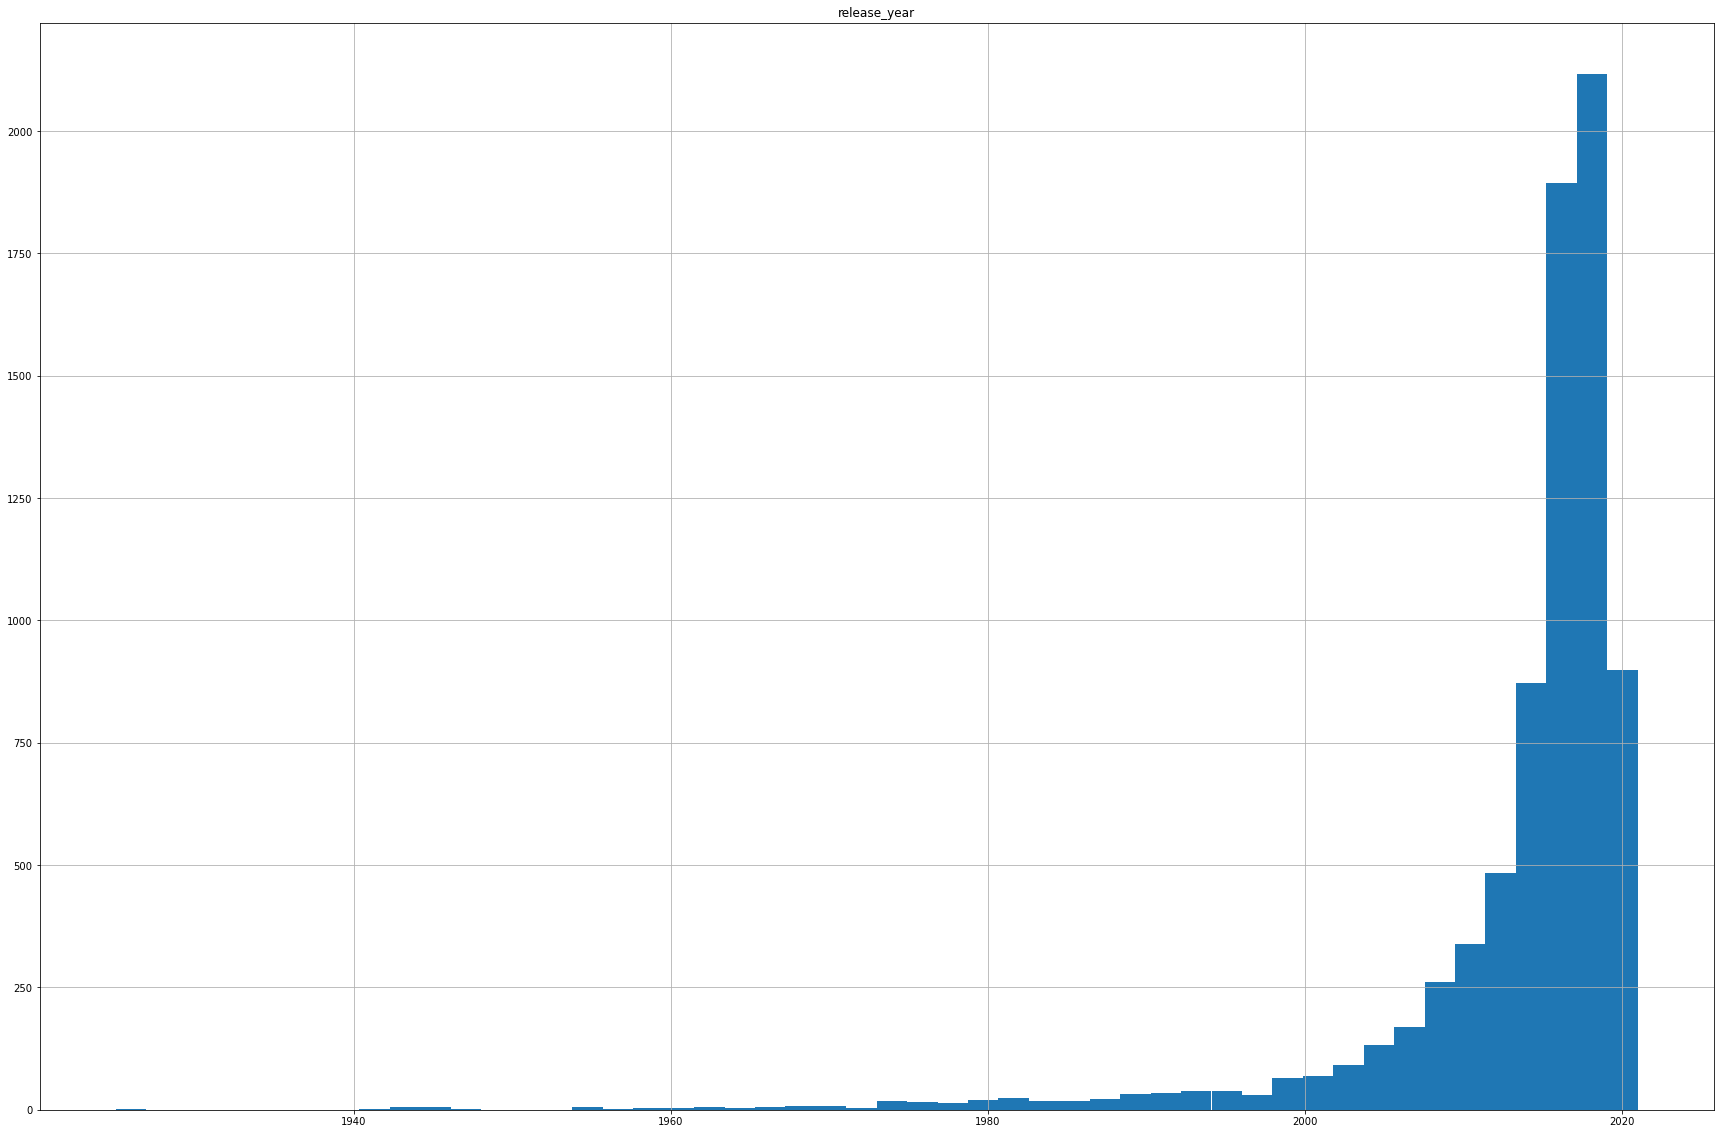

In [138]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,20))
plt.show()

## 2. Distplot

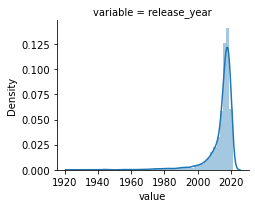

In [139]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

above we draw distrution bar graphs to confirm about statiscts of the data that we got our data have skewness so here also we notice with the above results that we have following details:

1 is negative skewed

## Let's proceed and check the distribution of the target variable.

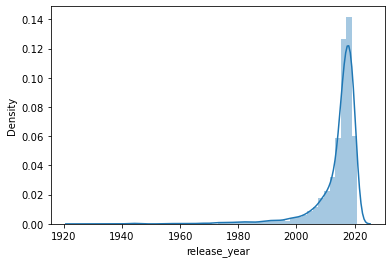

In [140]:
sns.distplot(df['release_year'])
plt.show()

# 3. Heatmap
## Correlation within feature variables

Correlation - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

## Correlation can have a value:
1. 1 is a perfect positive correlation
2. 0 is no correlation (the values don't seem linked at all)
3. -1 is a perfect negative correlation


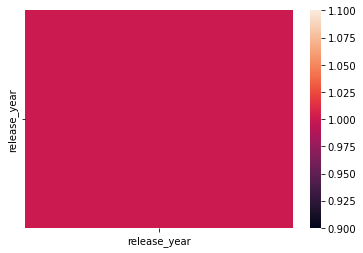

In [141]:
#correlation plot
corr = df.corr().abs()
sns.heatmap(corr)
plt.show()

In [142]:
corr

,release_year
release_year,1.0


In [143]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [144]:
to_drop

[]

In [145]:
for value in int64_lst_col:
    sns.lmplot(x=value, y="days", data=df);

plt.show()

KeyError: "['days'] not in index"

# 4.Boxplot

### Outliers

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set.

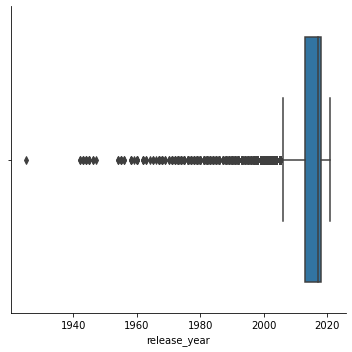

In [146]:
for value in int64_lst_col:
    sns.catplot(data=df, x=value, kind="box")
    
plt.show()

In [147]:
import plotly.graph_objects as go
val = df['type'].value_counts().index
cnt = df['type'].value_counts().values

fig = go.Figure([go.Bar(x=val, y=cnt, marker_color='darkturquoise')])
fig.update_layout(title_text='Netflix Sources Distribution', title_x=0.5)
fig.show()
#movie and tv show distribution

ModuleNotFoundError: No module named 'plotly'

In [ ]:
countries=pd.crosstab(df["country"],["type"]).sort_values(by="type",ascending=False)
countries.head(10).plot(kind="bar")
plt.legend()
plt.title("COUNTRY WITH HIGHEST NUMBER OF SHOWS")
plt.show()
#country based on show 

In [ ]:
df["type"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title("%AGE OF MOVIES AND TV SHOWS")
plt.legend()
plt.show()
#percentage of movie and tv show

In [30]:
df_movie = df[df['type']=='Movie'].groupby('release_year').count()
df_tv = df[df['type']=='TV Show'].groupby('release_year').count()


df_movie.reset_index(level=0, inplace=True)
df_tv.reset_index(level=0, inplace=True)

# fig = px.line(data_movie, x="release_year", y="type")
# fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_movie['release_year'], y=df_movie['type'],
                    mode='lines',
                    name='Movies', marker_color='mediumpurple'))
fig.add_trace(go.Scatter(x=df_tv['release_year'], y=df_tv['type'],
                    mode='lines',
                    name='TV Shows', marker_color='lightcoral'))
fig.update_layout(title_text='Trend Movies vs TV Shows in recent years', title_x=0.5)
fig.show()
#trend of movies and tv shows in recent year (from 1930 to 2020)

In [31]:
df_movie = df[df['type']=='Movie'].groupby('year_added').count()
df_tv = df[df['type']=='TV Show'].groupby('year_added').count()


df_movie.reset_index(level=0, inplace=True)
df_tv.reset_index(level=0, inplace=True)

# fig = px.line(data_movie, x="year_added", y="type")
# fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_movie['year_added'], y=df_movie['type'],
                    mode='lines',
                    name='Movies', marker_color='mediumpurple'))
fig.add_trace(go.Scatter(x=df_tv['year_added'], y=df_tv['type'],
                    mode='lines',
                    name='TV Shows', marker_color='lightcoral'))
fig.update_layout(title_text='Trend Movies vs TV Shows in year added', title_x=0.5)
fig.show()
#trend of movies and tv shows in year added (from 2008 to 2020)

In [32]:
df_movie = df[df['type']=='Movie'].groupby('month_added').count()
df_tv = df[df['type']=='TV Show'].groupby('month_added').count()


df_movie.reset_index(level=0, inplace=True)
df_tv.reset_index(level=0, inplace=True)

# fig = px.line(data_movie, x="year_added", y="type")
# fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_movie['month_added'], y=df_movie['type'],
                    mode='lines',
                    name='Movies', marker_color='mediumpurple'))
fig.add_trace(go.Scatter(x=df_tv['month_added'], y=df_tv['type'],
                    mode='lines',
                    name='TV Shows', marker_color='lightcoral'))
fig.update_layout(title_text='Trend Movies vs TV Shows in month added', title_x=0.5)
fig.show()
#Trend Movies vs TV Shows in month added (from august to september)

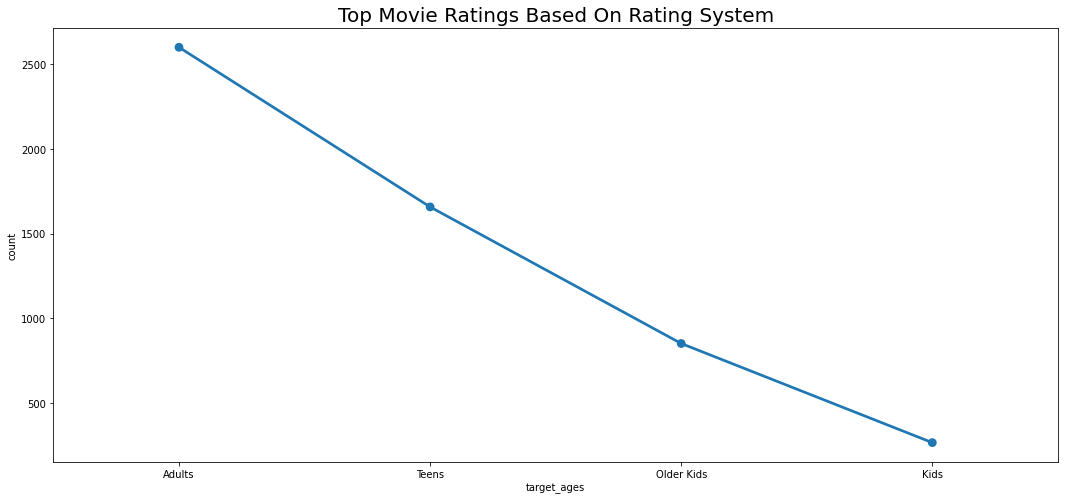

In [33]:
df_tv = df[df["type"] == "TV Show"]
df_movie = df[df["type"] == "Movie"]

movie_ratings = df_movie.groupby(['target_ages'])['type'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,8)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='target_ages',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()
#movie rating 

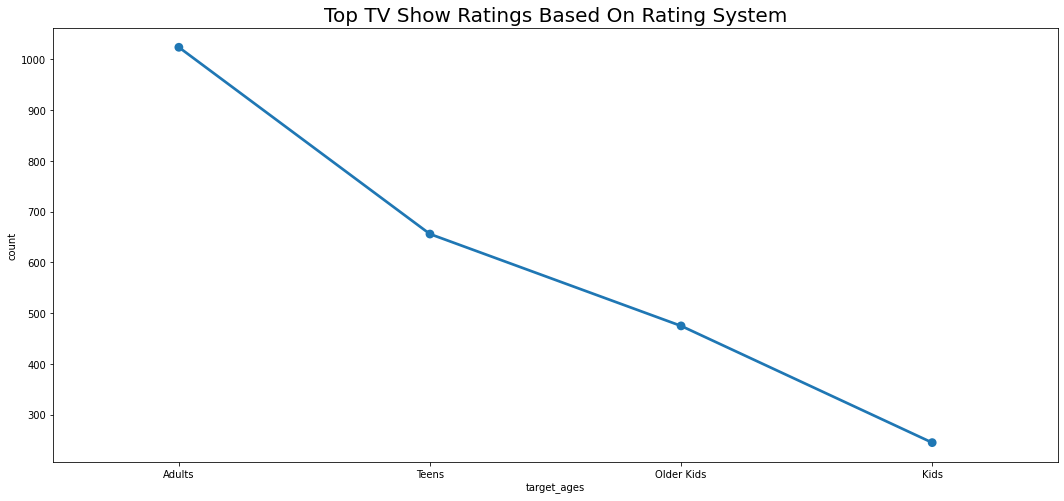

In [34]:
tv_ratings = df_tv.groupby(['target_ages'])['type'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,8)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='target_ages',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()
#tv show rating based on rating system

In [35]:
import plotly.express as px
def generate_rating_df(df):
    rating_df = df.groupby(['rating', 'target_ages']).agg({'type': 'count'}).reset_index()
    rating_df = rating_df[rating_df['type'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df


rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', title='Ratings of Movies And TV Shows Based On Target Age Groups',  labels={'counts':'COUNT', 'rating':'RATINGS', 'target_ages':'TARGET AGE GROUPS' })
fig.show()
#Ratings of Movies And TV Shows Based On Target Age Groups

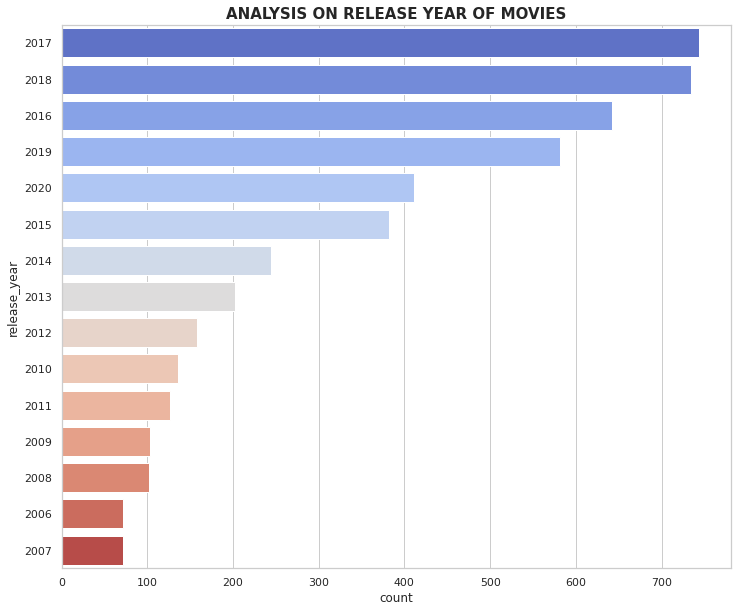

In [36]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(y="release_year", data=df_movie, palette="coolwarm", order=df_movie['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()
#release year of movies

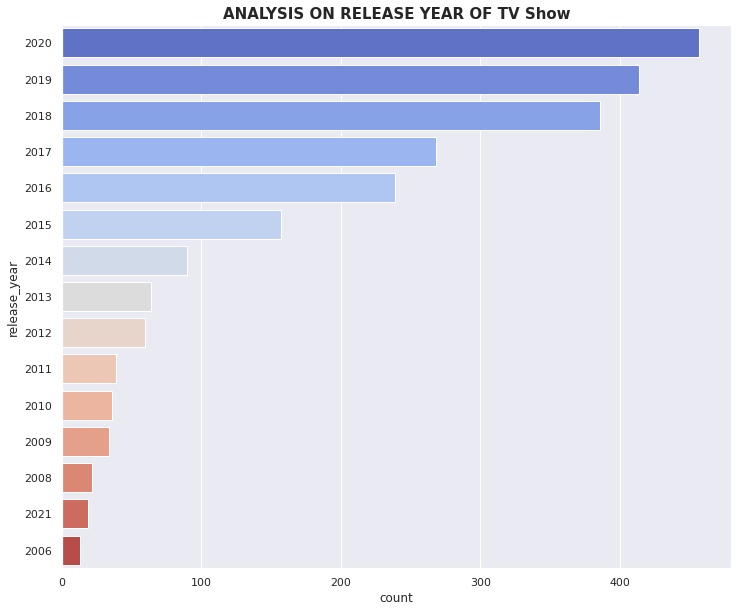

In [37]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_tv, palette="coolwarm", order=df_tv['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()
#release year of tv show

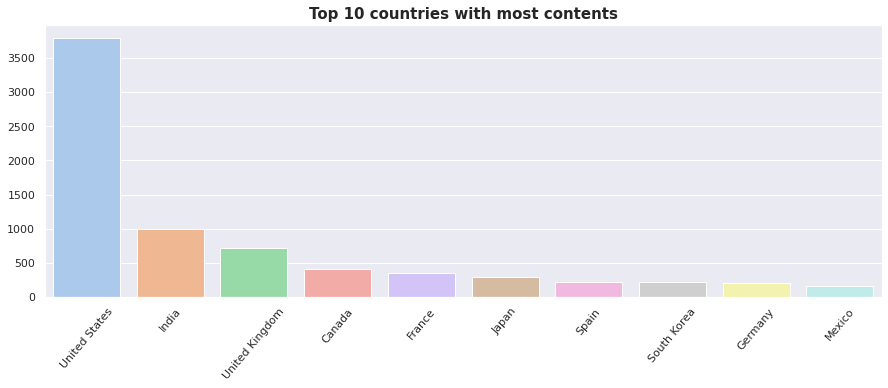

In [38]:
from collections import Counter
country_data = df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top20country = country_count.head(10)
plt.figure(figsize=(15,5))
sns.barplot(x= top20country.index, y=top20country, palette="pastel")
plt.xticks(rotation=50)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

In [39]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movie['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

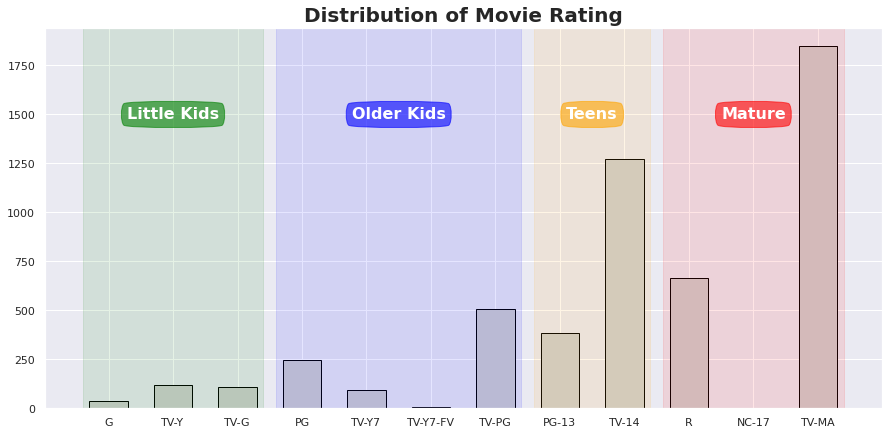

In [40]:
rating_barplot(movie_rating,'Movie', 1500)

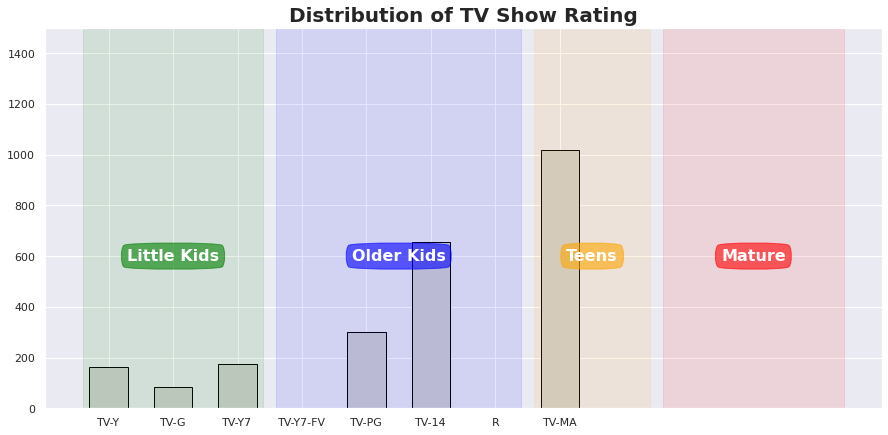

In [41]:
rating_barplot(tv_rating,'TV Show' , 600, 1500)

##Feature Engineering

In [44]:
#label encoding
from sklearn.preprocessing import LabelEncoder
'''target_ages_enc = LabelEncoder()
target_ages_enc.fit(df['target_ages'])
df['target_ages_enc'] = target_ages_enc.transform(df['target_ages'])'''
#adults is replaced by 0 , teens is replaced by 1 , older kids is replaced by 2 and kids is replaced by 3

"target_ages_enc = LabelEncoder()\ntarget_ages_enc.fit(df['target_ages'])\ndf['target_ages_enc'] = target_ages_enc.transform(df['target_ages'])"

In [45]:
#df.drop('target_ages', axis='columns', inplace=True)

In [46]:
type_enc = LabelEncoder()
type_enc.fit(df['type'])
df['type_enc'] = type_enc.transform(df['type'])
# movie is replaced by 1 and tv show is replaced by 0

In [47]:
df.drop('type', axis='columns', inplace=True)

In [48]:
title_enc = LabelEncoder()
title_enc.fit(df['title'])
df['title_enc'] = title_enc.transform(df['title'])

In [49]:
df.drop('title', axis='columns', inplace=True)

In [50]:
country_enc = LabelEncoder()
country_enc.fit(df['country'])
df['country_enc'] = country_enc.transform(df['country'])

In [51]:
df.drop('country', axis='columns', inplace=True)

In [52]:
df['date_added_date'] = df['date_added'].apply(lambda x: x.split(",")[-2])
df['date_added_date'].head()

0      August 14
1    December 23
2    December 20
3    November 16
4      January 1
Name: date_added_date, dtype: object

In [53]:
df

,date_added,release_year,rating,duration,listed_in,year_added,month_added,target_ages,type_enc,title_enc,country_enc,date_added_date
0,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,August,Adults,1,82,39,August 14
1,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",2016,December,Adults,0,124,308,December 23
2,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",2018,December,Adults,0,67,379,December 20
3,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,November,Teens,0,126,549,November 16
4,"January 1, 2020",2008,PG-13,123 min,Dramas,2020,January,Teens,0,60,549,January 1
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,"October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",2020,October,Adults,0,7749,429,October 19
7783,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,March,Teens,0,7751,229,March 2
7784,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...",2020,September,Adults,0,7752,549,September 25
7785,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",2020,October,Older Kids,1,7753,12,October 31


In [54]:
df['date_added_dates'] = df['date_added_date'].apply(lambda x: x.split(" ")[-1])
df['date_added_dates'].head()

0    14
1    23
2    20
3    16
4     1
Name: date_added_dates, dtype: object

In [55]:
df

,date_added,release_year,rating,duration,listed_in,year_added,month_added,target_ages,type_enc,title_enc,country_enc,date_added_date,date_added_dates
0,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,August,Adults,1,82,39,August 14,14
1,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",2016,December,Adults,0,124,308,December 23,23
2,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",2018,December,Adults,0,67,379,December 20,20
3,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,November,Teens,0,126,549,November 16,16
4,"January 1, 2020",2008,PG-13,123 min,Dramas,2020,January,Teens,0,60,549,January 1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,"October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",2020,October,Adults,0,7749,429,October 19,19
7783,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,March,Teens,0,7751,229,March 2,2
7784,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...",2020,September,Adults,0,7752,549,September 25,25
7785,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",2020,October,Older Kids,1,7753,12,October 31,31


In [56]:
df.drop('date_added', axis='columns', inplace=True)

In [57]:
df.drop('date_added_date', axis='columns', inplace=True)

In [58]:
df

,release_year,rating,duration,listed_in,year_added,month_added,target_ages,type_enc,title_enc,country_enc,date_added_dates
0,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,August,Adults,1,82,39,14
1,2016,TV-MA,93 min,"Dramas, International Movies",2016,December,Adults,0,124,308,23
2,2011,R,78 min,"Horror Movies, International Movies",2018,December,Adults,0,67,379,20
3,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,November,Teens,0,126,549,16
4,2008,PG-13,123 min,Dramas,2020,January,Teens,0,60,549,1
...,...,...,...,...,...,...,...,...,...,...,...
7782,2005,TV-MA,99 min,"Dramas, International Movies",2020,October,Adults,0,7749,429,19
7783,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,March,Teens,0,7751,229,2
7784,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...",2020,September,Adults,0,7752,549,25
7785,2019,TV-PG,1 Season,"International TV Shows, Reality TV",2020,October,Older Kids,1,7753,12,31


In [59]:
month_added_enc = LabelEncoder()
month_added_enc.fit(df['month_added'])
df['month_added_enc'] = month_added_enc.transform(df['month_added'])

In [60]:
df.drop('month_added', axis='columns', inplace=True)

In [61]:
year_added_enc = LabelEncoder()
year_added_enc.fit(df['year_added'])
df['year_added_enc'] = year_added_enc.transform(df['year_added'])

In [62]:
df.drop('year_added', axis='columns', inplace=True)

In [63]:
release_year_enc = LabelEncoder()
release_year_enc.fit(df['release_year'])
df['release_year_enc'] = release_year_enc.transform(df['release_year'])

In [64]:
df

,release_year,rating,duration,listed_in,target_ages,type_enc,title_enc,country_enc,date_added_dates,month_added_enc,year_added_enc,release_year_enc
0,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Adults,1,82,39,14,2,12,71
1,2016,TV-MA,93 min,"Dramas, International Movies",Adults,0,124,308,23,3,8,67
2,2011,R,78 min,"Horror Movies, International Movies",Adults,0,67,379,20,3,10,62
3,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",Teens,0,126,549,16,10,9,60
4,2008,PG-13,123 min,Dramas,Teens,0,60,549,1,5,12,59
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,2005,TV-MA,99 min,"Dramas, International Movies",Adults,0,7749,429,19,11,12,56
7783,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",Teens,0,7751,229,2,8,11,66
7784,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...",Adults,0,7752,549,25,12,12,70
7785,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Older Kids,1,7753,12,31,11,12,70


In [65]:
df.drop('release_year', axis='columns', inplace=True)

In [66]:
df

,rating,duration,listed_in,target_ages,type_enc,title_enc,country_enc,date_added_dates,month_added_enc,year_added_enc,release_year_enc
0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Adults,1,82,39,14,2,12,71
1,TV-MA,93 min,"Dramas, International Movies",Adults,0,124,308,23,3,8,67
2,R,78 min,"Horror Movies, International Movies",Adults,0,67,379,20,3,10,62
3,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",Teens,0,126,549,16,10,9,60
4,PG-13,123 min,Dramas,Teens,0,60,549,1,5,12,59
...,...,...,...,...,...,...,...,...,...,...,...
7782,TV-MA,99 min,"Dramas, International Movies",Adults,0,7749,429,19,11,12,56
7783,TV-14,111 min,"Dramas, International Movies, Music & Musicals",Teens,0,7751,229,2,8,11,66
7784,TV-MA,44 min,"Documentaries, International Movies, Music & M...",Adults,0,7752,549,25,12,12,70
7785,TV-PG,1 Season,"International TV Shows, Reality TV",Older Kids,1,7753,12,31,11,12,70


In [67]:
rating_enc = LabelEncoder()
rating_enc.fit(df['rating'])
df['rating_enc'] = rating_enc.transform(df['rating'])

In [68]:
df.drop('rating', axis='columns', inplace=True)

In [69]:
duration_enc = LabelEncoder()
duration_enc.fit(df['duration'])
df['duration_enc'] = duration_enc.transform(df['duration'])

In [70]:
df.drop('duration', axis='columns', inplace=True)

In [71]:
listed_in_enc = LabelEncoder()
listed_in_enc.fit(df['listed_in'])
df['listed_in_enc'] = listed_in_enc.transform(df['listed_in'])

In [72]:
df.drop('listed_in', axis='columns', inplace=True)

In [73]:
target_ages_enc = LabelEncoder()
target_ages_enc.fit(df['target_ages'])
df['target_ages_enc'] = target_ages_enc.transform(df['target_ages'])

In [74]:
df.drop('target_ages', axis='columns', inplace=True)

In [75]:
df

,type_enc,title_enc,country_enc,date_added_dates,month_added_enc,year_added_enc,release_year_enc,rating_enc,duration_enc,listed_in_enc,target_ages_enc
0,1,82,39,14,2,12,71,8,147,397,0
1,0,124,308,23,3,8,67,8,209,309,0
2,0,67,379,20,3,10,62,5,190,335,0
3,0,126,549,16,10,9,60,4,194,47,3
4,0,60,549,1,5,12,59,4,30,293,3
...,...,...,...,...,...,...,...,...,...,...,...
7782,0,7749,429,19,11,12,56,8,215,309,0
7783,0,7751,229,2,8,11,66,6,16,311,3
7784,0,7752,549,25,12,12,70,8,152,268,0
7785,1,7753,12,31,11,12,70,9,0,367,2


Quasi Constant Removal

In [76]:
from sklearn.feature_selection import VarianceThreshold

In [77]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(df)

len(df.columns[constant_filter.get_support()])

constant_columns = [column for column in df.columns
                    if column not in df.columns[constant_filter.get_support()]]

df.drop(labels=constant_columns, axis=1, inplace=True)

In [78]:
df

,type_enc,title_enc,country_enc,date_added_dates,month_added_enc,year_added_enc,release_year_enc,rating_enc,duration_enc,listed_in_enc,target_ages_enc
0,1,82,39,14,2,12,71,8,147,397,0
1,0,124,308,23,3,8,67,8,209,309,0
2,0,67,379,20,3,10,62,5,190,335,0
3,0,126,549,16,10,9,60,4,194,47,3
4,0,60,549,1,5,12,59,4,30,293,3
...,...,...,...,...,...,...,...,...,...,...,...
7782,0,7749,429,19,11,12,56,8,215,309,0
7783,0,7751,229,2,8,11,66,6,16,311,3
7784,0,7752,549,25,12,12,70,8,152,268,0
7785,1,7753,12,31,11,12,70,9,0,367,2


In [79]:
qconstant_filter = VarianceThreshold(threshold=0.16)
qconstant_filter.fit(df)

VarianceThreshold(threshold=0.16)

In [80]:
len(df.columns[qconstant_filter.get_support()])

11

In [81]:
qconstant_columns = [column for column in df.columns
                    if column not in df.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))

0


##Feature Selection

<AxesSubplot:>

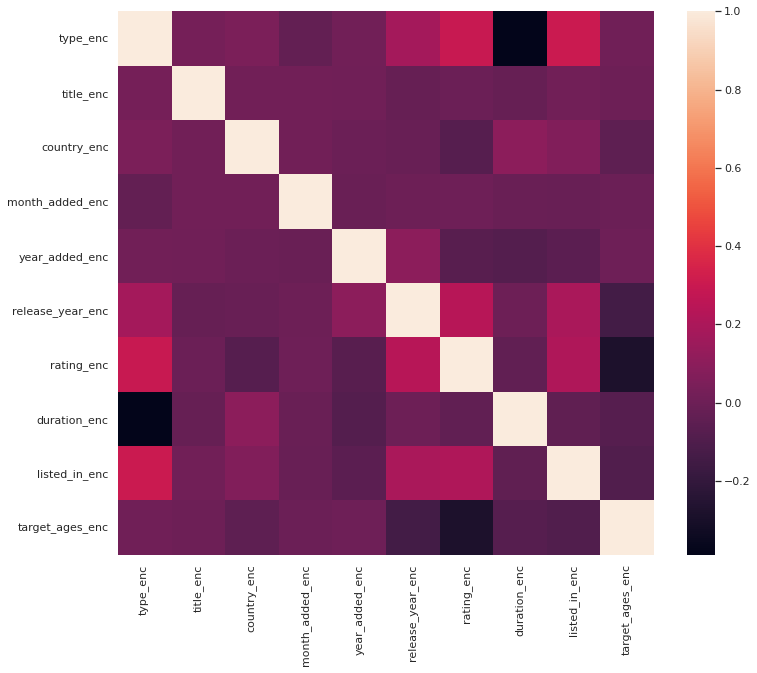

In [82]:
corrmat = df.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(corrmat)

<AxesSubplot:>

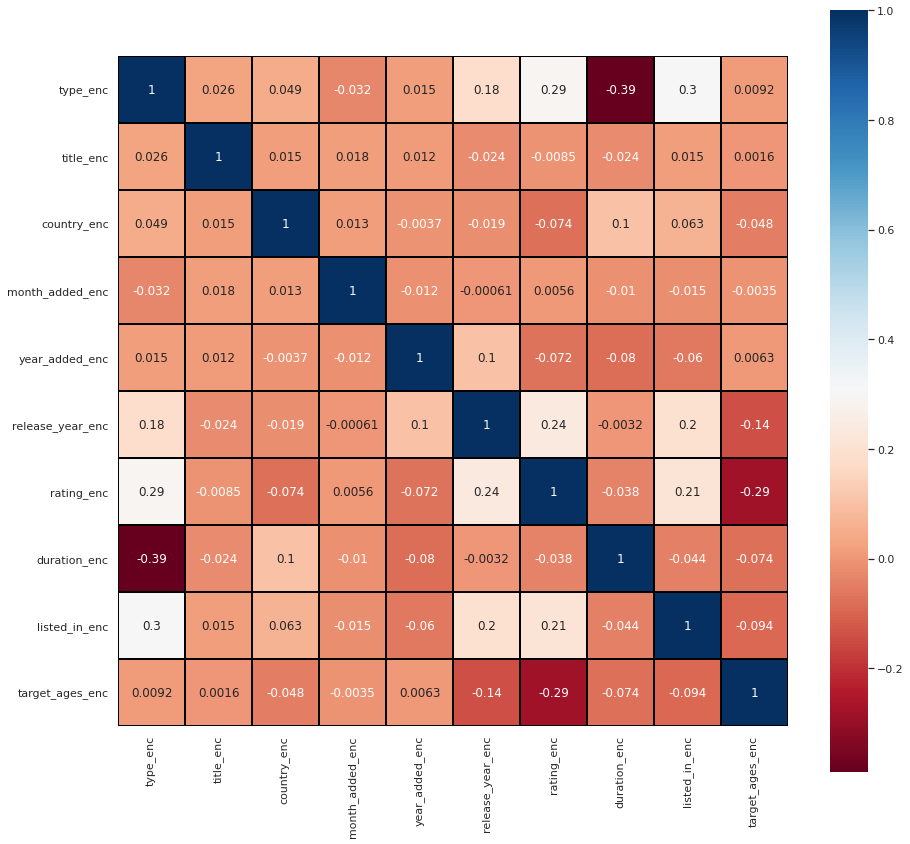

In [83]:
colormap = plt.cm.RdBu
plt.subplots(figsize=(15,14))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='black' , annot=True)

In [84]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if  (corr_matrix.iloc[i, j] >= threshold) :
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr


In [85]:
corr_features = correlation(df , 0.8)
len(set(corr_features))

0

In [86]:
df.cov()

,type_enc,title_enc,country_enc,month_added_enc,year_added_enc,release_year_enc,rating_enc,duration_enc,listed_in_enc,target_ages_enc
type_enc,0.213394,2.692876e+01,3.956498,-0.052400,0.009374,0.700350,0.259921,-15.468720,17.437488,0.005613
title_enc,26.928755,5.040792e+06,5996.277521,138.957819,37.022891,-468.077289,-36.989198,-4634.270319,4269.469264,4.607124
country_enc,3.956498,5.996278e+03,30662.369370,8.045881,-0.907739,-29.090083,-25.259512,1520.632053,1376.593334,-11.063128
month_added_enc,-0.052400,1.389578e+02,8.045881,12.496946,-0.057773,-0.018639,0.038379,-3.130510,-6.845807,-0.016326
year_added_enc,0.009374,3.702289e+01,-0.907739,-0.057773,1.926943,1.203157,-0.194602,-9.563391,-10.495443,0.011566
release_year_enc,0.700350,-4.680773e+02,-29.090083,-0.018639,1.203157,74.060846,3.978009,-2.393014,211.092180,-1.595819
rating_enc,0.259921,-3.698920e+01,-25.259512,0.038379,-0.194602,3.978009,3.772875,-6.332255,51.308285,-0.730428
duration_enc,-15.468720,-4.634270e+03,1520.632053,-3.130510,-9.563391,-2.393014,-6.332255,7434.084351,-475.827982,-8.401468
listed_in_enc,17.437488,4.269469e+03,1376.593334,-6.845807,-10.495443,211.092180,51.308285,-475.827982,15651.904872,-15.557151
target_ages_enc,0.005613,4.607124e+00,-11.063128,-0.016326,0.011566,-1.595819,-0.730428,-8.401468,-15.557151,1.737182


In [87]:
y = df.iloc[:,[10]] #target column

In [88]:
df.drop(df.columns[10], axis=1, inplace=True)

In [89]:
x=df

##Modeling

In [90]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtr,ytr)
    pred=knn.predict(xts)
    res1=accuracy_score(yts,pred)
print("K Nearest Neighbors Top 5 Success Rates is:" , "{:.2f}%".format(100*res1))

K Nearest Neighbors Top 5 Success Rates is: 50.39%


In [92]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(xtr,ytr)
pred1=rf.predict(xts)
res2=accuracy_score(yts,pred1)
print("Random Forest Classifier Success Rate is :", "{:.2f}%".format(100*res2))


Random Forest Classifier Success Rate is : 99.49%


In [93]:
lst = [res1 , res2]

In [94]:
lst

[0.5038560411311054, 0.9948586118251928]

In [95]:
lst2 = ["KNearestNeighbours" , "RandomForest"]

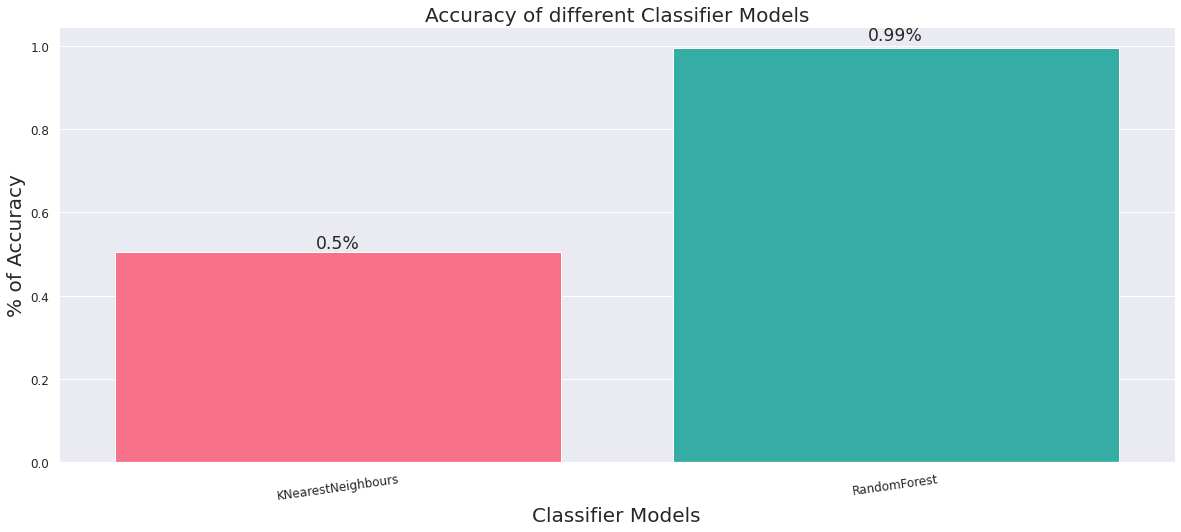

In [96]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=lst2, y=lst, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()